In [1]:
import yaml

In [6]:
with open('yolov5s.yaml', encoding='ascii', errors='ignore') as f:
    yamlf = yaml.safe_load(f)  # model dict
    
print(yamlf['anchors'])
print(len(yamlf['anchors'][0]))

[[10, 13, 16, 30, 33, 23], [30, 61, 62, 45, 59, 119], [116, 90, 156, 198, 373, 326]]
6


In [6]:
import moxing as mox
import numpy as np

with mox.file.File('obs://4in1/4in1s/labels/000004.txt', 'r') as f:
    data = f.readlines()
labels, bboxes = [], []
for item in data:
    item = item.replace("\r\n", "")
    ss = item.split(" ")
    ss = [float(kk) for kk in ss]
    labels.append(ss[0])
    bboxes.append(ss[1:])
    
labes = np.array(labels)
bboxes = np.array(bboxes)
print(labels)
print(bboxes)

[3.0, 0.0]
[[0.49882813 0.55277778 0.07734375 0.19444444]
 [0.478125   0.50972222 0.540625   0.98055556]]


/home/ma-user/anaconda3/envs/MindSpore/lib/python3.7/site-packages/ipykernel/__main__.py:5: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


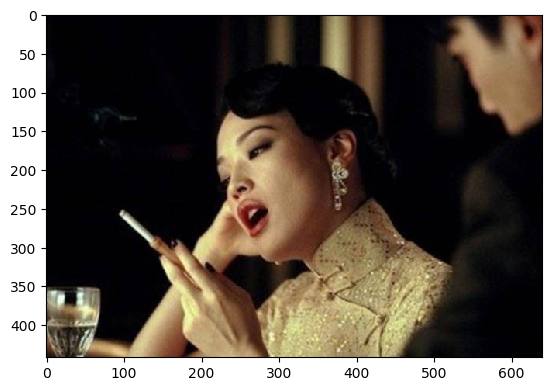

In [13]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

ss = cv2.imdecode(np.fromstring(mox.file.read('obs://4in1/4in1s/images/000046.jpg', binary=True), np.uint8), cv2.IMREAD_COLOR)
ss = ss[:,:,::-1]  # convert to RGB
ss = np.reshape

In [18]:
import random
s = 320
mosaic_border = [-s // 2, -s // 2]

print(int(random.uniform(160, 2*320-160)))

yc, xc = [int(random.uniform(-x, 2*s+x)) for x in mosaic_border]
print(xc)
print(yc)

img4 = np.full((640, 640, 3), 114, dtype=np.uint8)
print(img4.shape)
print(np.unique(img4))

166
311
225
(640, 640, 3)
[114]


In [20]:
s = []
s.extend([2,3])
s.append(1)
print(s)

[2, 3, 1]


In [4]:
# 修改id
import moxing as mox
with mox.file.File("obs://4in1/4in1s/train.txt", 'r') as f:
    data = f.readlines()
print(data)

['4in1/4in1s/images/smoke_b000238.jpg\r\n', '4in1/4in1s/images/12304177_170110293000_2.jpg\r\n', '4in1/4in1s/images/5524146_185631493000_2.jpg\r\n', '4in1/4in1s/images/799232_20211202221031361080_1.jpg\r\n', '4in1/4in1s/images/pic473.jpg\r\n', '4in1/4in1s/images/VCG41N1209228006.jpg\r\n', '4in1/4in1s/images/true(172).jpg\r\n', '4in1/4in1s/images/pic270.jpg\r\n', '4in1/4in1s/images/smoke_b643.jpg\r\n', '4in1/4in1s/images/smoke_b001092.jpg\r\n', '4in1/4in1s/images/58PIC9w58PICgVW9GXT8SPxPi564_PIC2018.jpg\r\n', '4in1/4in1s/images/213291_002839662_2.jpg\r\n', '4in1/4in1s/images/VCG41N521088564.jpg\r\n', '4in1/4in1s/images/12304177_170054967000_2.jpg\r\n', '4in1/4in1s/images/893187_20211102113306626039_1.jpg\r\n', '4in1/4in1s/images/2457331_192911524000_2.jpg\r\n', '4in1/4in1s/images/pics67.jpg\r\n', '4in1/4in1s/images/true(71).jpg\r\n', '4in1/4in1s/images/20658PIC7rtgKa3SMiS4a_PIC2018.jpg\r\n', '4in1/4in1s/images/smoke_b000207.jpg\r\n', '4in1/4in1s/images/799232_20210903205908396080_1.jpg\

In [1]:
# 测试dataset的准确性
from dataset import Dataset

INFO:root:Using MoXing-v2.0.0.rc2.4b57a67b-4b57a67b
INFO:root:Using OBS-Python-SDK-3.20.9.1


In [2]:
ds = Dataset(image_dir="obs://4in1/4in1s/images/", \
             anno_dir="obs://4in1/4in1s/labels/",\
             image_ids="obs://4in1/4in1s/train.txt", input_size=640, is_training=True)

In [4]:
for i in range(10):
    s1, s2, s3, s4 = ds[i]
    print(s1)
    print(s2)
    print(s3)
    print(s4)

[[[114 114 114]
  [114 114 114]
  [114 114 114]
  ...
  [114 114 114]
  [114 114 114]
  [114 114 114]]

 [[114 114 114]
  [114 114 114]
  [114 114 114]
  ...
  [114 114 114]
  [114 114 114]
  [114 114 114]]

 [[114 114 114]
  [114 114 114]
  [114 114 114]
  ...
  [114 114 114]
  [114 114 114]
  [114 114 114]]

 ...

 [[114 114 114]
  [114 114 114]
  [114 114 114]
  ...
  [229 229 227]
  [229 229 227]
  [229 229 227]]

 [[114 114 114]
  [114 114 114]
  [114 114 114]
  ...
  [230 230 228]
  [230 230 228]
  [230 230 228]]

 [[114 114 114]
  [114 114 114]
  [114 114 114]
  ...
  [230 230 228]
  [230 230 228]
  [230 230 228]]]
[[6.910e+02 6.540e+02 7.260e+02 6.730e+02 3.000e+00]
 [1.280e+03 3.920e+02 1.280e+03 4.320e+02 3.000e+00]
 [5.980e+02 1.063e+03 6.390e+02 1.110e+03 3.000e+00]
 [1.037e+03 1.280e+03 1.129e+03 1.280e+03 1.000e+00]]
[640, 640]
[1]
[[[172 185 191]
  [174 187 193]
  [181 192 196]
  ...
  [208 213 216]
  [209 214 217]
  [209 214 217]]

 [[169 182 188]
  [173 186 192]
  [178

In [11]:
print(len(ds))

704


0
(280, 390, 3)
[[205. 120. 240. 139.   3.]]
[640, 640] [0]


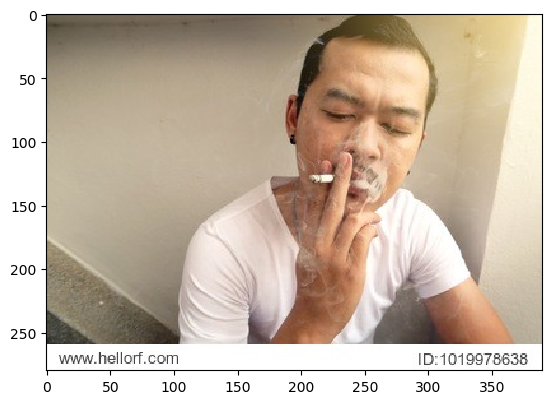

1
(1280, 1280, 3)
[[2.750e+02 0.000e+00 5.700e+02 2.110e+02 2.000e+00]
 [8.170e+02 0.000e+00 1.280e+03 2.500e+02 2.000e+00]
 [5.000e+00 5.760e+02 5.720e+02 9.770e+02 1.000e+00]
 [1.125e+03 9.690e+02 1.280e+03 1.082e+03 2.000e+00]]
[640, 640] [1]


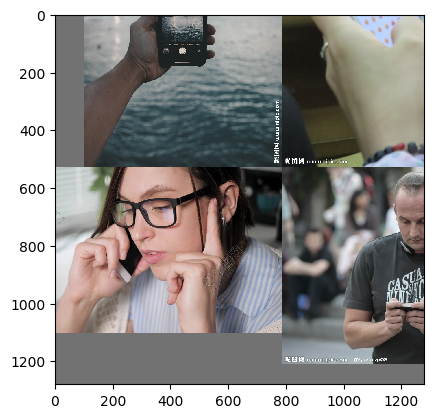

2
(1280, 1280, 3)
[[0.000e+00 0.000e+00 0.000e+00 5.300e+01 2.000e+00]
 [1.029e+03 0.000e+00 1.280e+03 6.300e+01 2.000e+00]
 [2.970e+02 1.214e+03 3.410e+02 1.269e+03 2.000e+00]
 [2.780e+02 1.122e+03 4.370e+02 1.280e+03 0.000e+00]
 [9.880e+02 5.690e+02 1.127e+03 7.360e+02 1.000e+00]]
[640, 640] [1]


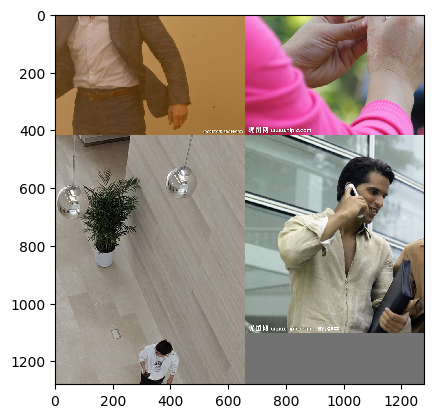

3
(600, 900, 3)
[[466. 114. 647. 316.   1.]]
[640, 640] [0]


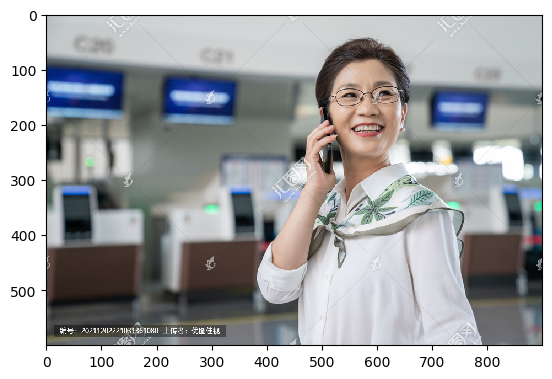

4
(1920, 1080, 3)
[[552. 408. 591. 443.   3.]
 [587. 386. 611. 441.   1.]
 [396. 331. 651. 727.   0.]]
[640, 640] [0]


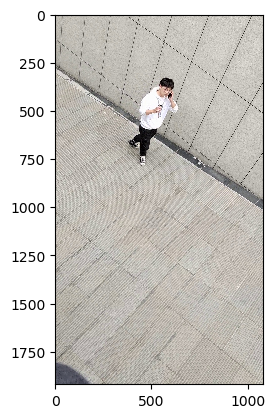

5
(1280, 1280, 3)
[[1.110e+02 0.000e+00 2.090e+02 0.000e+00 1.000e+00]
 [0.000e+00 0.000e+00 3.870e+02 3.190e+02 0.000e+00]
 [5.750e+02 2.570e+02 6.110e+02 2.830e+02 3.000e+00]
 [0.000e+00 1.265e+03 0.000e+00 1.280e+03 2.000e+00]
 [1.151e+03 8.560e+02 1.195e+03 9.000e+02 1.000e+00]]
[640, 640] [1]


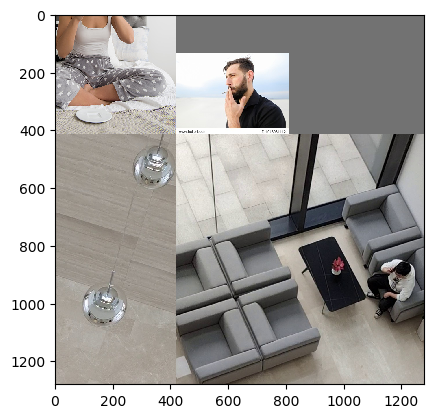

6
(1280, 1280, 3)
[[3.330e+02 3.360e+02 3.990e+02 4.190e+02 1.000e+00]
 [9.470e+02 8.800e+01 9.690e+02 1.130e+02 3.000e+00]
 [7.880e+02 0.000e+00 1.100e+03 6.800e+02 0.000e+00]
 [4.000e+02 1.049e+03 4.580e+02 1.087e+03 1.000e+00]
 [1.090e+03 9.620e+02 1.198e+03 1.079e+03 2.000e+00]
 [8.970e+02 7.550e+02 1.230e+03 1.187e+03 0.000e+00]]
[640, 640] [1]


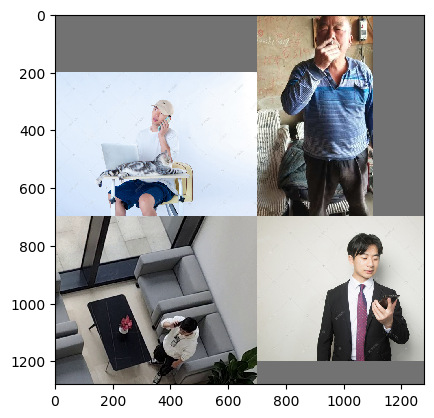

7
(1920, 1080, 3)
[[ 428. 1055.  501. 1168.    2.]
 [ 513. 1194.  613. 1280.    3.]]
[640, 640] [0]


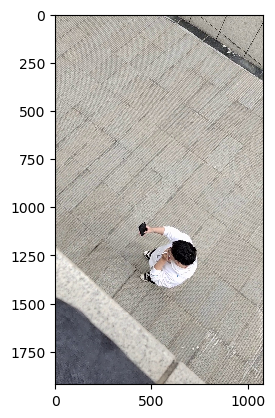

8
(299, 450, 3)
[[ 73. 112. 177. 162.   3.]]
[640, 640] [0]


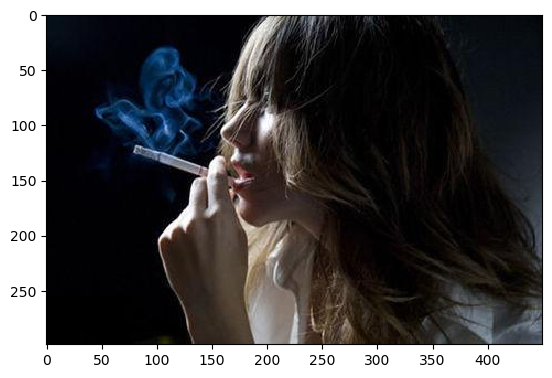

9
(1280, 1280, 3)
[[7.740e+02 3.080e+02 8.110e+02 3.360e+02 3.000e+00]
 [1.233e+03 0.000e+00 1.280e+03 6.500e+01 3.000e+00]
 [4.310e+02 7.400e+02 8.270e+02 1.280e+03 1.000e+00]
 [1.280e+03 1.138e+03 1.280e+03 1.169e+03 3.000e+00]
 [1.280e+03 6.810e+02 1.280e+03 9.950e+02 0.000e+00]]
[640, 640] [1]


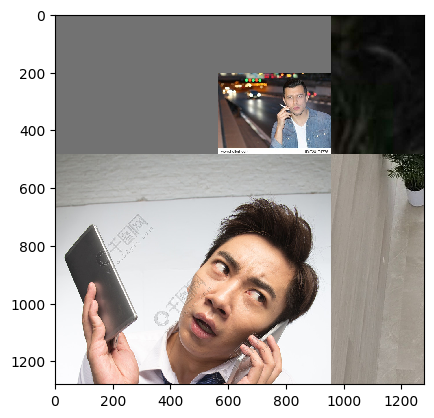

In [3]:
import matplotlib.pyplot as plt
for i in range(10):
    img, target, input_size, flag = ds[i]
    print(i)
    print(img.shape)
    print(target)
    print(input_size, flag)
    plt.imshow(img)
    plt.show()
#     if i==10:
#         break

In [1]:
# 测试dataset
from dataset import create_yolo_dataset
from config import config as cfg
import matplotlib.pyplot as plt
import numpy as np
from mindspore import dtype_to_pytype
import cv2

print(cfg)


ds = create_yolo_dataset(image_dir="obs://4in1/4in1s/images/", \
                         anno_dir="obs://4in1/4in1s/labels/", \
                         image_ids="obs://4in1/4in1s/train.txt", \
                         batch_size=1, config=cfg)

steps_per_epoch = ds.get_dataset_size()
print(steps_per_epoch)

INFO:root:Using MoXing-v2.0.0.rc2.4b57a67b-4b57a67b
INFO:root:Using OBS-Python-SDK-3.20.9.1
[WARNING] ME(146146:281473572652496,MainProcess):2022-12-08-11:38:12.860.882 [mindspore/dataset/core/config.py:464] The shared memory is on, multiprocessing performance will be improved. Note: the required shared memory can't exceeds 80% of the available shared memory. You can reduce max_rowsize or reduce num_parallel_workers to reduce shared memory usage.


{'input_size': 640, 'anchor_scales': [[12, 16], [19, 36], [40, 28], [36, 75], [76, 55], [72, 146], [142, 110], [192, 243], [459, 401]], 'max_box': 150, 'num_classes': 4, 'jitter': 0.3, 'hue': 0.015, 'saturation': 1.5, 'value': 0.4, 'label_smooth': 0, 'label_smooth_factor': 0.1}
704


In [2]:
# batch check
data_loader = ds.create_tuple_iterator(do_copy=False)

[WARNING] ME(146289:281473572652496,_GeneratorWorkerMp-20):2022-12-08-11:38:45.310.287 [mindspore/dataset/engine/queue.py:108] Using shared memory queue, but rowsize is larger than allocated memory max_rowsize 6291456 current rowsize 46924380
[WARNING] ME(146288:281473572652496,_GeneratorWorkerMp-19):2022-12-08-11:38:52.745.109 [mindspore/dataset/engine/queue.py:108] Using shared memory queue, but rowsize is larger than allocated memory max_rowsize 6291456 current rowsize 7283520
[WARNING] ME(146286:281473572652496,_GeneratorWorkerMp-17):2022-12-08-11:38:57.413.305 [mindspore/dataset/engine/queue.py:108] Using shared memory queue, but rowsize is larger than allocated memory max_rowsize 6291456 current rowsize 7283520


In [3]:
for step_idx, data in enumerate(data_loader):
    image = data[0]
    anno = data[1]
    bbox0, bbox1, bbox2 = data[2], data[3], data[4]
    gt_box0, gt_box1, gt_box2 = data[5], data[6], data[7]
    
    # convert to numpy
    image = image.asnumpy()
    anno = anno.asnumpy()
    bbox0 = bbox0.asnumpy()
    bbox1 = bbox1.asnumpy()
    bbox2 = bbox2.asnumpy()
    gt_box0 = gt_box0.asnumpy()
    gt_box1 = gt_box1.asnumpy()
    gt_box2 = gt_box2.asnumpy()
    
#     image = image[0]
#     image = np.transpose(image, [1,2,0])
#     plt.imshow(image)
#     plt.show()
    
    print(image.shape)
    print(gt_box0[gt_box0 > 0])
    print(anno.shape, bbox0.shape, bbox1.shape, bbox2.shape, gt_box0.shape, gt_box1.shape, gt_box2.shape)
    break

(1, 12, 320, 320)
[]
(1, 150, 5) (1, 20, 20, 3, 9) (1, 40, 40, 3, 9) (1, 80, 80, 3, 9) (1, 150, 4) (1, 150, 4) (1, 150, 4)


[WARNING] ME(146146:281468718797280,MainProcess):2022-12-08-11:38:46.509.925 [mindspore/dataset/engine/queue.py:108] Using shared memory queue, but rowsize is larger than allocated memory max_rowsize 16777216 current rowsize 46924380


(1, 640, 640, 3)
(3, 640, 640)


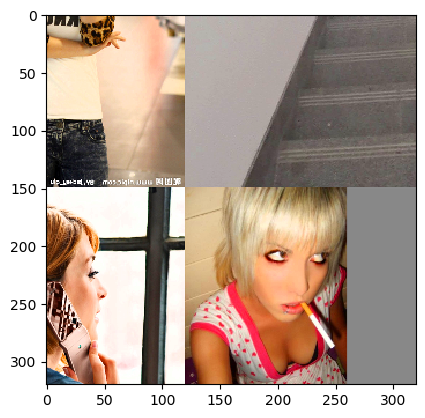

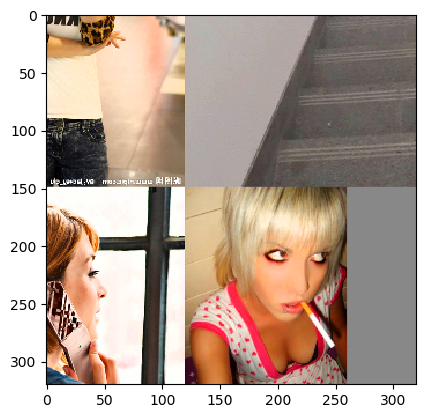

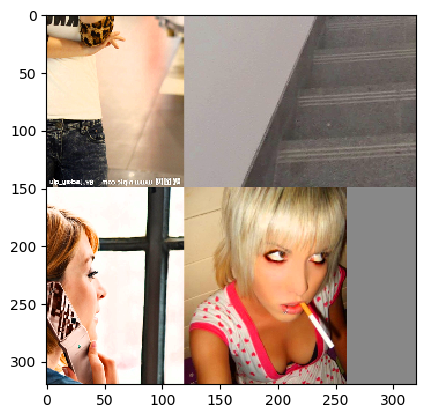

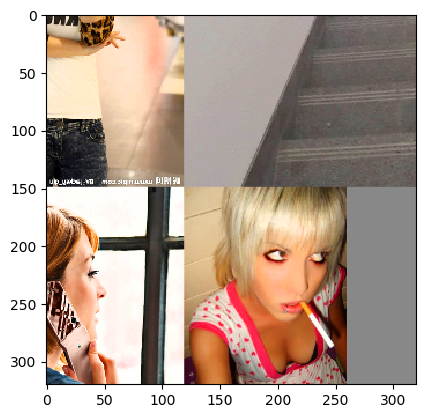

(12, 320, 320)


In [15]:
for step_idx, data in enumerate(data_loader):
    images = data[0]
    annotations = data[1]
    size = data[2]
    
    print(images.shape)
#     print(annotation.shape)
#     print(type(images))
    
    images = images.asnumpy()
    annotations = annotations.asnumpy()
    
    images = images[0]
    
    images = np.transpose(images, [2,0,1])
    print(images.shape)
    
    s1 = images[..., ::2, ::2]
    s1 = np.transpose(s1, [1,2,0])
    
    plt.imshow(s1)
    plt.show()
    
    s2 = images[..., 1::2, ::2]
    s2 = np.transpose(s2, [1,2,0])
    plt.imshow(s2)
    plt.show()
    
    s3 = images[..., ::2, 1::2]
    s3 = np.transpose(s3, [1,2,0])
    plt.imshow(s3)
    plt.show()
    
    s4 = images[..., 1::2, 1::2]
    s4 = np.transpose(s4, [1,2,0])
    plt.imshow(s4)
    plt.show()
    
    images = np.concatenate((images[..., ::2, ::2], images[..., 1::2, ::2],\
                                     images[..., ::2, 1::2], images[..., 1::2, 1::2]), axis=0)
    
    print(images.shape)
    
#     image = images[0]
#     annotation = annotations[0]
    
#     kk = np.sum(annotation, axis=1)
#     valid_index = np.where(kk > 0)
#     valid_annotation = annotation[valid_index]
#     print(valid_annotation)
    
#     valid_annotation = np.round(valid_annotation).astype(np.int32)
#     for i in range(len(valid_annotation)):
#         x1, y1, x2, y2, label = valid_annotation[i]
#         cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 5)
    
#     plt.imshow(image)
#     plt.show()
    
    break
    
#     if step_idx > 2:
#         break

In [49]:
import numpy as np
anchors = np.array([[12, 16],
                        [19, 36],
                        [40, 28],
                        [36, 75],
                        [76, 55],
                        [72, 146],
                        [142, 110],
                        [192, 243],
                        [459, 401]])

anchors = np.expand_dims(anchors, 0)
anchors_max = anchors / 2.   # 为撒子 /2
anchors_min = -anchors_max


boxes_wh = valid_annotation[..., 2:4] - valid_annotation[..., 0:2]
print(boxes_wh.shape)
boxes_wh = np.expand_dims(boxes_wh, -2)
boxes_max = wh / 2.
print()

(8, 2)
(8, 1, 2)


In [33]:
# 测试切片工作
from mindspore import Tensor
from mindspore.ops import StridedSlice, Concat
import numpy as np
import cv2
import moxing as mox
import matplotlib.pyplot as plt


img = cv2.imdecode(np.fromstring(mox.file.read('obs://4in1/4in1s/images/000002.jpg', binary=True), np.uint8), cv2.IMREAD_COLOR)
img = cv2.resize(img, (640, 640))

img = np.expand_dims(img, axis=0)
print(img.shape)

# plt.imshow(img)
# plt.show()

tensor = Tensor(img)
slice_op = StridedSlice()
concat_op = Concat(axis=-1)

batch = len(tensor)

k1 = slice_op(tensor, (0, 0, 0, 0), (batch, 640, 640, 3), (1, 2, 2, 1))
k2 = slice_op(tensor, (0, 0, 1, 0), (batch, 640, 640, 3), (1, 2, 2, 1))
k3 = slice_op(tensor, (0, 1, 0, 0), (batch, 640, 640, 3), (1, 2, 2, 1))
k4 = slice_op(tensor, (0, 1, 1, 0), (batch, 640, 640, 3), (1, 2, 2, 1))
# k2 = Slice(img, begin=())

k_result = concat_op((k1, k2, k3, k4))

k_result = k_result.asnumpy()

print(k_result.shape)

# k1 = k1.asnumpy()
# k2 = k2.asnumpy()
# k3 = k3.asnumpy()
# k4 = k4.asnumpy()

# print(k1.shape)
# print(k2.shape)
# print(k3.shape)
# print(k4.shape)

# plt.imshow(k1)
# plt.show()
# plt.imshow(k2)
# plt.show()
# plt.imshow(k3)
# plt.show()
# plt.imshow(k4)
# plt.show()

# print(ss.shape)

(1, 640, 640, 3)
(1, 320, 320, 12)
